We are going to use 2008 US swing state election results at county level (3 states PA, OH, FL)retrived from data.gov.

In [5]:
import pandas as pd
df = pd.read_csv("2008_swing_states.csv")
df.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64


We are interested in the fraction of the vote that went to Barack Obama in each county.

In [7]:
df[['state','county','dem_share']]

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04
...,...,...,...
217,OH,Hamilton County,53.53
218,OH,Highland County,36.54
219,OH,Hocking County,49.58
220,OH,Licking County,41.97


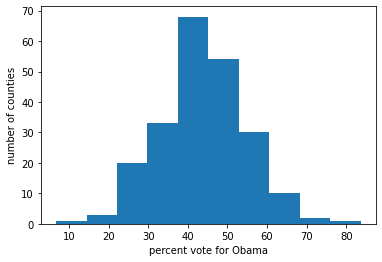

In [8]:
import matplotlib.pyplot as plt
_ = plt.hist(df['dem_share'])
_ = plt.xlabel('percent vote for Obama')
_ = plt.ylabel('number of counties')

plt.show()

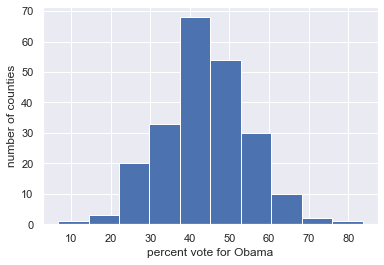

In [9]:
import seaborn as sns
sns.set()
_ = plt.hist(df['dem_share'])
_ = plt.xlabel('percent vote for Obama')
_ = plt.ylabel('number of counties')

plt.show()

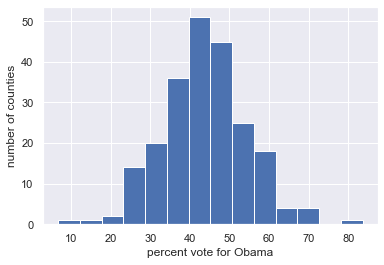

In [14]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(df['dem_share'])

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(df['dem_share'], bins=n_bins)

# Label axes
_ = plt.xlabel('percent vote for Obama')
_ = plt.ylabel('number of counties')

# Show histogram
plt.show()

A major drawback of using histograms is that the same data set can look different depending on how the bins are chosen. And choice of bins is in many ways arbitrary. This leads to binning bias. An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values.


To remedy these problems we can make a bee swarm plot, also called a swarm plot. This is best shown by example. Here is a beeswarm plot of the vote totals in the three swing states. Each point in the plot represents the share of the vote Obama got in a single county. The position along the y-axis is the quantitative information. The data are spread in x to make them visible, but their precise location along the x-axis is unimportant. Notably, we no longer have any binning bias and all data are displayed. This plot may be conveniently generated using Seaborn.

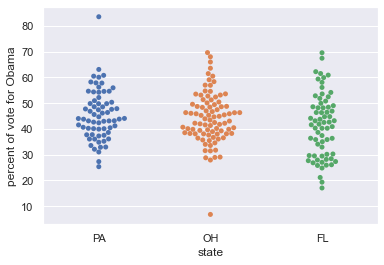

In [21]:
_ = sns.swarmplot(x='state', y='dem_share', data=df)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

However, there is a limit to their efficacy. For example, imagine we wanted to plot the county-level voting data for all states east of the Mississippi River and all states west. We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi. The bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option. As an alternative, we can compute an empirical cumulative distribution function, or ECDF. Again, this is best explained by example. 

In [22]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

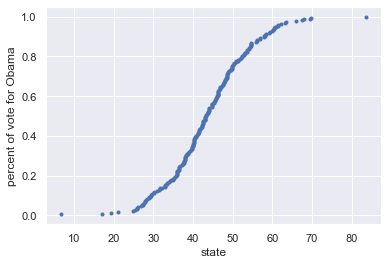

In [23]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df['dem_share'])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')

# Display the plot
plt.show()


Here is a picture of an ECDF of the percentage of swing state votes that went to Obama. A x-value of an ECDF is the quantity we are measuring, in this case the percent of vote that sent to Obama. The y-value is the fraction of data points that have a value smaller than the corresponding x-value.For example, 20% of counties in swing states had 36% or less of its people vote for Obama. Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.

In [65]:
df['state'].unique()

array(['PA', 'OH', 'FL'], dtype=object)

In [66]:
padf= df[df.state=='PA']
ohdf= df[df.state=='OH']
fldf= df[df.state=='FL']

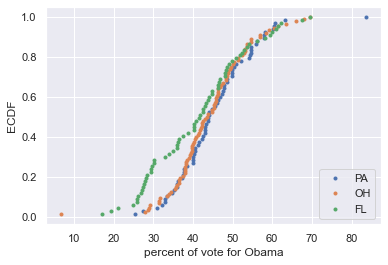

In [68]:
# Compute ECDFs
x_, y_ = ecdf(padf['dem_share'])
x_1, y_1 = ecdf(ohdf['dem_share'])
x_2, y_2 = ecdf(fldf['dem_share'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_, y_, marker='.', linestyle='none')
_ = plt.plot(x_1, y_1, marker='.', linestyle='none')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('PA', 'OH', 'FL'), loc='lower right')
# Label the axes
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
# Display the plot
plt.show()

 We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties. In my workflow, I almost always plot the ECDF first. It shows all the data and gives a complete picture of how the data are distributed.

We have seen that histograms, bee swarm plots, and ECDFs provide effective summaries of data. But we often would like to summarize data even more succinctly, say in one or two numbers. These numerical summaries are not by any stretch a substitute for the graphical methods we have been employing, but they do take up a lot less real estate.

Let's go back to the election data from the swing states again. If we could summarize the percentage of the votes for Obama at the county level in Pennsylvania in one number, what would we choose? The first number that pops into my mind is the mean and median. The mean for a given state is just the average percentage of votes over the counties and the median is the middle value of a data set. It is defined by how it is calculated: sort the the data and choosing the datum in the middle.  If we add the means as horizontal lines to the bee swarm plot, we see that they are a reasonable summary of the data.

In [71]:
np.mean(padf['dem_share'])

45.476417910447765

In [72]:
np.median(padf['dem_share'])

44.03

The median is a special name for the 50th percentile; that is 50% of the data are less than the median. Similarly, the 25th percentile is the value of the data point that is greater than 25% of the sorted data, and so on for any other percentile we want.

In [73]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(df['dem_share'], percentiles)

# Print the result
print(ptiles_vers)

[25.58675 37.3025  43.185   49.925   64.7195 ]


To see how the percentiles relate to the ECDF, 

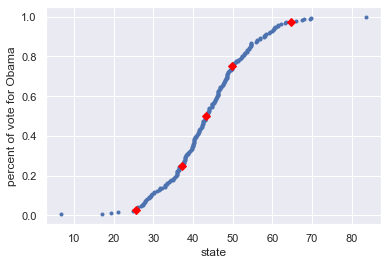

In [86]:
# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')

# Overlay percentiles as red x's
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

The edges of the boxes are the 25th and 75th percentile. The total height of the box contains the middle 50% of the data, and is called the interquartile range, or IQR. The whiskers extend a distance of 1-point-5 times the IQR, or to the extent of the data, whichever is more extreme. Finally, any points outside of the whiskers are plotted as individual points, which we often demarcate as outliers. While there is no single definition for an outlier, being more than 2 IQRs away from the median is a common criterion. It is important to remember that an outlier is not necessarily an erroneous data point. We should not assume an outlier is erroneous unless you have some known reason to. Since there is zero evidence of any substantial voter fraud in the United States, these outliers are not erroneous. They are just data points with extreme values. When the number of data are very large and bee swarm plots are too cluttered, box plots are a great alternative.

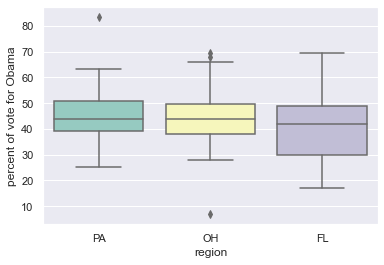

In [96]:
_ = sns.boxplot(x='state', y='dem_share', data=df,
                  palette="Set3")

_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')

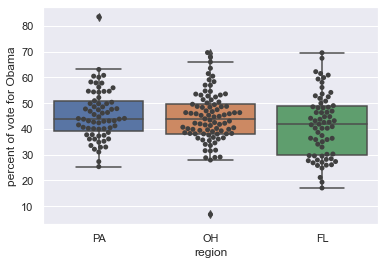

In [99]:
_ = sns.boxplot(x='state', y='dem_share', data=df)
_ = sns.swarmplot(x='state', y='dem_share', data=df,color=".25")
_ = plt.xlabel('region')

_ = plt.ylabel('percent of vote for Obama')

In [89]:
# Array of differences to mean: differences
differences = padf['dem_share'] - np.mean(padf['dem_share'])

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(padf['dem_share'] )

# Print the results
print(variance_explicit, variance_np)


94.66503492982848 94.66503492982848


In [90]:
# Compute the variance: variance
variance = np.var(padf['dem_share'])

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(padf['dem_share']))

9.729595825615187
9.729595825615187


We have more data than just the vote share for Obama. We also know the total number of votes in each county. Let's look at how these two quantities vary together.

We start by looking at a scatter plot of the county data for the three swing states, plotting the percent vote for Obama versus the total number of votes in each county. Immediately from the scatter plot, we see that the twelve most populous counties all voted for Obama, and that most of the counties with small populations voted for McCain.

To generate a scatter plot, we plot the data as points by setting the marker and linestyle keyword arguments of plt dot plot. (And of course we label the axes!) So, we have exposed another graphical EDA technique: scatter plots! We would like to have a summary statistic to go along with the information we have just gleaned from the scatter plot. We want a number that summarizes how Obama's vote share varies with the total vote count. One such statistic is the covariance. 


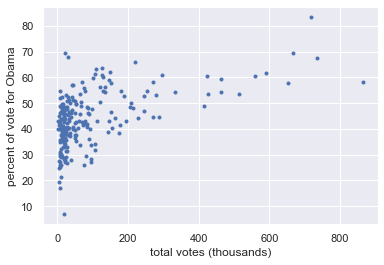

In [102]:
_ = plt.plot(df['total_votes']/1000, df['dem_share'], marker='.', linestyle='none')

_ = plt.xlabel('total votes (thousands)')

_ = plt.ylabel('percent of vote for Obama')

The covariance is the mean of the product of these differences. If x and y both tend to be above, or both below their respective means together, as they are in this data set, then the covariance is positive. This means that they are positively correlated: when x is high, so is y; when the county is populous, it has more votes for Obama. Conversely, if x is high while y is low, the covariance is negative, and the data are negatively correlated, or anticorrelated, which is not the case for this data set. We can compute the covariance using built-in NumPy functions. However, if we want to have a more generally applicable measure of how two variables depend on each other, we want it to be dimensionless, that is to not have any units.



- Look at the spread in the x-direction in the plots: The plot with the largest spread is the one that has the highest variance.
- High covariance means that when x is high, y is also high, and when x is low, y is also low.
- Negative covariance means that when x is high, y is low, and when x is low, y is high.

In [105]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(df['total_votes']/1000, df['dem_share'])

# Print covariance matrix
print(covariance_matrix)

_cov = covariance_matrix[0,1]

print(_cov)


[[20245.10393632   817.30936184]
 [  817.30936184   114.76344739]]
817.3093618405288


So, we can divide the covariance by the standard deviations of the x and y variables. This is called the Pearson correlation coefficient, usually denoted by the Greek letter rho. It is a comparison of the variability in the data due to codependence (the covariance) to the variability inherent to each variable independently (their standard deviations). Conveniently, it is dimensionless and ranges from -1 (for complete anticorrelation) to 1 (for complete correlation).

A value of zero means that there is no correlation at all between the data, as shown in the plot on the upper left. Data with intermediate values are shown on the other plots. As you can see, the Pearson correlation coefficient is a good metric for correlation between two variables.

In [107]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(df['total_votes']/1000, df['dem_share'])

# Print the result
print(r)

0.5361973649586781


Statistical inference involves taking our data to probabilistic conclusions about what we would expect if we took even more data, and we can make decisions based on these conclusions.

Probabilistic language is in fact very precise. It precisely describes uncertainty.